In [1]:
import os

# Set Kaggle API key and username
os.environ['KAGGLE_USERNAME'] = 'KAGGLE_USERNAME'
os.environ['KAGGLE_KEY'] = 'KAGGLE_KEY'


In [2]:
!kaggle datasets download -d emmarex/plantdisease


Dataset URL: https://www.kaggle.com/datasets/emmarex/plantdisease
License(s): unknown
100% 657M/658M [00:17<00:00, 41.6MB/s]
100% 658M/658M [00:17<00:00, 40.1MB/s]


In [3]:
from zipfile import ZipFile
file_name = "/content/plantdisease.zip" # Changed the file name to the correct one.
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [4]:
import os
import shutil

# Set the path to the dataset directory
dataset_dir = "/content/PlantVillage"

# List all directories in the dataset
directories = [f for f in os.listdir(dataset_dir) if os.path.isdir(os.path.join(dataset_dir, f))]

# Specify the directories you want to delete (all paths should be relative to dataset_dir)
directories_to_delete = [
    "Pepper__bell___Bacterial_spot",
    "Pepper__bell___healthy",
    "Potato___Early_blight",
    "Potato___healthy",
    "Potato___Late_blight",
]

# Iterate over the directories and delete them along with their contents
for directory in directories_to_delete:
    directory_path = os.path.join(dataset_dir, directory)
    if os.path.exists(directory_path):
        shutil.rmtree(directory_path)
        print(f"Deleted directory: {directory_path}")
    else:
        print(f"Directory not found: {directory_path}")


Deleted directory: /content/PlantVillage/Pepper__bell___Bacterial_spot
Deleted directory: /content/PlantVillage/Pepper__bell___healthy
Deleted directory: /content/PlantVillage/Potato___Early_blight
Deleted directory: /content/PlantVillage/Potato___healthy
Deleted directory: /content/PlantVillage/Potato___Late_blight



**Directories & Classes**<br>
These are the path of the dataset innter folders and classes in the given dataset

In [5]:
DIRECTORY = r'/content/'
FOLDERS = ['PlantVillage']
CLASSES = ['Tomato_healthy',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato_Septoria_leaf_spot',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_Leaf_Mold',
 'Tomato_Bacterial_spot',
 'Tomato_Late_blight',
 'Tomato_Early_blight',
 'Tomato__Tomato_YellowLeaf__Curl_Virus']

In [6]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [7]:
import os
import cv2
import numpy as np
from skimage.feature import hog

# Function to extract HOG features
def extract_hog_features(image_path):
    """
    Extract HOG features from an image.
    """
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize image to a fixed size
    image_resized = cv2.resize(image, (64, 64))

    # Extract HOG features
    fd, hog_image = hog(image_resized, orientations=9, pixels_per_cell=(8, 8),
                        cells_per_block=(2, 2), visualize=True)

    return fd  # Return feature vector




In [8]:
# Initialize data and labels
data = []
labels = []

# Iterate through folders and classes
for folder in FOLDERS:
    folder_path = os.path.join(DIRECTORY, folder)
    for classification in CLASSES:
        image_path = os.path.join(folder_path, classification)
        images = os.listdir(image_path)
        images = images[:500]  # Limit to first 500 images

        for image in images:
            try:
                image_url = os.path.join(image_path, image)

                # Extract HOG features
                features = extract_hog_features(image_url)

                # Get label index
                label = CLASSES.index(classification)

                # Append features and label
                data.append(features)
                labels.append(label)
            except Exception as e:
                print("Error: ", e)


In [9]:
# Convert to NumPy arrays
X = np.array(data)
y = np.array(labels)



In [10]:
print("Data shape:", X.shape)
print("Labels shape:", y.shape)


Data shape: (4873, 1764)
Labels shape: (4873,)


In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize Logistic Regression classifier
logistic_classifier = LogisticRegression(
    multi_class='multinomial',  # For multi-class classification
    solver='lbfgs',             # Solver for optimization
    random_state=42
)


In [14]:
# Train the classifier
logistic_classifier.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=42)

In [15]:

# Predict on the test set
y_pred = logistic_classifier.predict(X_test)

In [16]:


# Print evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.61      0.62       112
           1       0.56      0.50      0.53       102
           2       0.39      0.37      0.38       107
           3       0.26      0.25      0.25       101
           4       0.38      0.45      0.41        67
           5       0.41      0.45      0.43        95
           6       0.57      0.54      0.55        95
           7       0.45      0.49      0.47        92
           8       0.39      0.41      0.40        94
           9       0.61      0.59      0.60       110

    accuracy                           0.47       975
   macro avg       0.47      0.47      0.47       975
weighted avg       0.47      0.47      0.47       975



In [17]:

print("Accuracy Score: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Accuracy Score: 46.87%


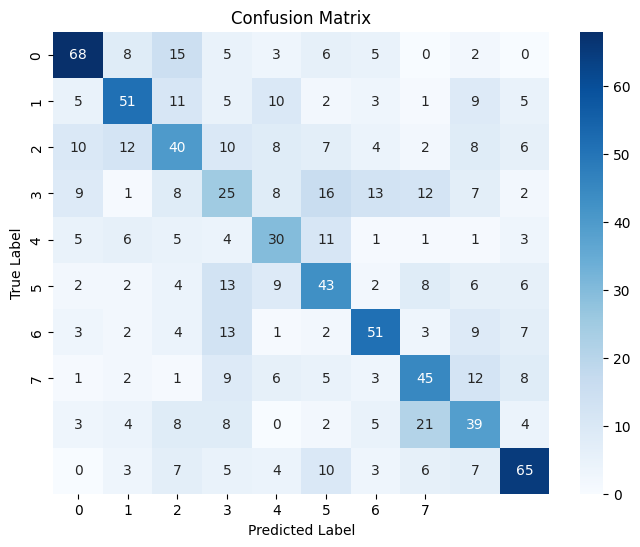

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 1. Calculate the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# 2. Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[str(i) for i in range(8)],
            yticklabels=[str(i) for i in range(8)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

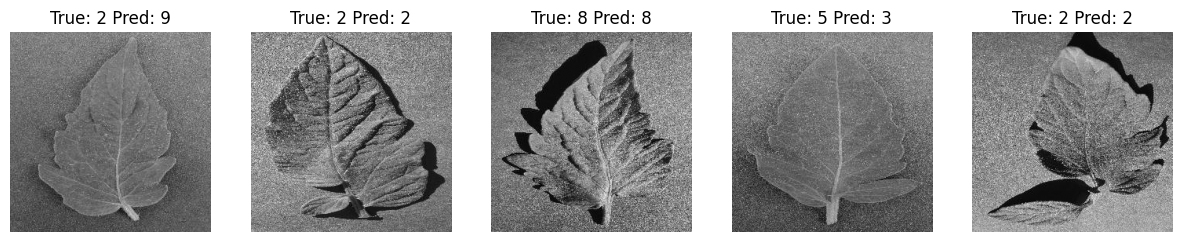

In [19]:
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 7. Visualize some results (optional)
# Let's visualize a few test images and their predictions
def visualize_predictions(image_paths, y_test, y_pred, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(15, 5))
    for i in range(num_images):
        image = cv2.imread(image_paths[i], cv2.IMREAD_GRAYSCALE)
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f"True: {y_test[i]} Pred: {y_pred[i]}")
        axes[i].axis('off')
    plt.show()

# Before calling visualize_predictions, create image_paths:
image_paths = []  # Initialize an empty list
for folder in FOLDERS:
    folder_path = os.path.join(DIRECTORY, folder)
    for classification in CLASSES:
        image_path = os.path.join(folder_path, classification)
        images = os.listdir(image_path)
        images = images[:500]  # Limit to first 500 images for consistency
        for image in images:
            image_url = os.path.join(image_path, image)
            image_paths.append(image_url) # Append image path to the list

# Now you can call visualize_predictions
visualize_predictions(image_paths[:5], y_test, y_pred)